## Attributes:
- distance between eyebrows ---- (21,22)
    * left_eyebrow[4],right_eyebrow[0]
- length of left eyebrow ------- (17,21)
    * left_eyebrow[0],left_eyebrow[4]
- length of right eyebrow ------ (22,26)
    * right_eyebrow[0],right_eyebrow[4]
- height of right eyebrow ------ (20,20.5)
    * need to claculate
- height of left eyebrow ------- (25,25.5)
    * need to claculate
    
- distance between eyes -------- (39,43)
    * left_eye[3],right_eye[0]

- length of left eye ----------- (36,39)
    * left_eye[0],left_eye[3]
- length of right eye ---------- (42,45)
    * right_eye[0],right_eye[3]

- height of left eye ----------- (37,40)
    * left_eye[1],left_eye[4]
- height of right eye ---------- (43,46)
    * right_eye[1],right_eye[4]

- height of nose --------------- (27,30)
    * nose_bridge[0],nose_bridge[3]
- width of nose ---------------- (31,35)
    * nose_tip[0],nose_tip[4]
    
- nose to mouth distance ------- (33,51)
    * nose_tip[2],top_lip[4]
- mouth width ------------------ (48,54)
    * top_lip[0],top_lip[6]
- mouth height ----------------- (51,57)
    * top_lip[4],bottom_lip[3]

- right mouth to chin distance - (54,12)
    * top_lip[6],chin[12]
- left mouth to chin distance --- (48,4)
    * top_lip[0],chin[4]
    
- chin height ------------------ (57,8)
    * bottom_lip[3],chin[8]
- chin arch ---??--------------- (5,13) ??

## Getting Distances
- chin:           [0:17],
- left_eyebrow:   [17:22],
- right_eyebrow:  [22:27],
- nose_bridge:    [27:31],
- nose_tip:       [31:36],
- left_eye:       [36:42],
- right_eye:      [42:48],
- top_lip:        [48:55] + [64] + [63] + [62] + [61] + [60],
- bottom_lip:     [54:60] + [48] + [60] + [67] + [66] + [65] + [64]

In [1]:
import pandas as pd
import numpy as np
import ast
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
from PIL import Image

### Getting the data

In [2]:
df_all_string = pd.read_csv('data_landmarks_normalised_attributes.csv')

In [3]:
# for i in range(len(df_all_string.columns)):
#     print('{}){}'.format(i,df_all_string.columns[i]))

### Extract raw dataframe from data_landmarks_normalised_attributes.csv

In [4]:
# Function for formating String to lsit of topules
def format_str_to_touples(str_list):
    str_list=str_list.replace('[','')
    str_list=str_list.replace(']','')
    str_list=str_list.replace('(','')
    str_list=str_list.replace(')','')
    str_list=str_list.replace(' ','')
    str_list=str_list.split(',')
    str_list=[float(i)for i in str_list]
    result = [(str_list[i],str_list[i+1]) for i in range(0,len(str_list),2)]
    return result

In [5]:
def format_dict_str_list_touples_floats(dataframe):
    data_dict = {}
    for col in dataframe:
        col_lists = []
        for col_list in dataframe[col]:
            col_list = format_str_to_touples(col_list)
            col_lists += [col_list]
        data_dict[col]=col_lists 
    data_df = pd.DataFrame(data_dict)
    return data_df

In [6]:
# will return properly formatted dataframe for data_landmarks_normalised_attributes.csv 
def get_raw_dataframe():
    columns_as_lists = ["bottom_lip_norm","chin_norm","left_eye_norm","left_eyebrow_norm","nose_bridge_norm","nose_tip_norm",
                        "right_eye_norm","right_eyebrow_norm","top_lip_norm"]

    # only load 4 value into df_all
#     df_string = df_all_string[columns_as_lists].copy().head(4)
    df_string = df_all_string[columns_as_lists].copy(True)
    df_raw = format_dict_str_list_touples_floats(df_string)
    # append attractive column to dataframe
    df_raw["Attractive"] = df_all_string["Attractive"]
    return df_raw

### Get personalized Attributed dataframe

In [7]:
def get_distance(tuple_pt1, tuple_pt2):
    distance = math.sqrt((tuple_pt1[0] - tuple_pt2[0])**2 + (tuple_pt1[1] - tuple_pt2[1])**2)
    return distance

In [8]:
def get_identifying_attributes(chin, bottem_lip, top_lip, right_eye, left_eye, right_eyebrow, left_eyebrow, nose_bridge, nose_tip):
        distance_between_eyebrows = get_distance(left_eyebrow[4], right_eyebrow[0])
        # length of eyebrows
        length_of_left_eyebrow = get_distance(left_eyebrow[0], left_eyebrow[4])
        length_of_right_eyebrow = get_distance(right_eyebrow[0], right_eyebrow[4])
        # height of eyebrows
#         height_of_right_eyebrow = get_distance()
#         height_of_left_eyebrow = get_distance()
        distance_between_eyes= get_distance(left_eye[3], right_eye[0])
        # length of eyes
        length_of_left_eye = get_distance(left_eye[0],left_eye[3])
        length_of_right_eye = get_distance(right_eye[0], right_eye[3])
        # height of eyes
        height_of_left_eye = get_distance(left_eye[1],left_eye[4])
        height_of_right_eye = get_distance(right_eye[1], right_eye[4])
        # nose
        height_of_nose = get_distance(nose_bridge[0], nose_bridge[3])
        width_of_nose = get_distance(nose_tip[0], nose_tip[4])
        # mouth
        nose_to_mouth_distance = get_distance(nose_tip[2], top_lip[4])
        mouth_width = get_distance(top_lip[0], top_lip[6])
        mouth_height = get_distance(top_lip[4], bottem_lip[3])
        # mouth to chine
        right_mouth_to_chin_distance = get_distance(top_lip[6], chin[12])
        left_mouth_to_chin_distance = get_distance(top_lip[0],chin[4])
        # chin
        chin_height = get_distance(bottem_lip[3], chin[8])
        
        
        attributes_list  = [distance_between_eyebrows, length_of_left_eyebrow, length_of_right_eyebrow, distance_between_eyes, length_of_left_eye,
                           length_of_right_eye, height_of_left_eye, height_of_right_eye, height_of_nose, width_of_nose,
                           nose_to_mouth_distance, mouth_width, mouth_height, right_mouth_to_chin_distance, left_mouth_to_chin_distance,
                           chin_height]
        
        
        return attributes_list
        
        

In [9]:
def get_personalised_attribute_dataframe(df_all):
    # iterate over data_df and get attributes
    data_dict = dict()
    for index, row in df_all.iterrows():
        attractiveness = row[-1]
        # chin, bottem_lip, top_lip, right_eye, left_eye, right_eyebrow, left_eyebrow, nose_bride, nose_tip
        attributes = get_identifying_attributes(row[1],row[0],row[8],row[6],row[2],row[7],row[3],row[4],row[5])
        data_dict[index] = attributes + [attractiveness]

    # create dataframe
    df_personalized = pd.DataFrame.from_dict(data_dict, orient='index')
    columns = ['distance_between_eyebrows', 'length_of_left_eyebrow', 'length_of_right_eyebrow', 'distance_between_eyes', 'length_of_left_eye',
                               'length_of_right_eye', 'height_of_left_eye', 'height_of_right_eye', 'height_of_nose', 'width_of_nose',
                               'nose_to_mouth_distance', 'mouth_width', 'mouth_height', 'right_mouth_to_chin_distance', 'left_mouth_to_chin_distance',
                               'chin_height', 'Attractive']
    df_personalized.columns = columns
    return df_personalized

In [10]:
from itertools import combinations
def get_distances_between_all_points(list_of_points):
    distance_list = [get_distance(*combo) for combo in combinations(list_of_points,2)]
    return distance_list

## Get final dataframe that contains attributes we train on

In [11]:
# get the row of the df and put all of it into a lstt
df_raw = None
def get_attributes_df():
    # get raw df 
    df_raw = get_raw_dataframe()
    # convert df into personalised df (head(4) for testing)
    df = get_personalised_attribute_dataframe(df_raw)
    return df

# df = get_attributes_df()

In [29]:
# df_raw.columns
def convert_row_into_list_of_points(df):
    values = df.drop("Attractive", axis=1)
    values = values.values.tolist()
    concatenated_row = []
    all_rows = []
    print(len(values))
    for row in values:
        concatenated_row = []
        print(len(row))
        for lst in row:
            concatenated_row += lst
        all_rows.append(concatenated_row)
    return all_rows

In [32]:
def get_all_coordinates_distanced_dataframe():
    df_raw = get_raw_dataframe()
    datapoints = convert_row_into_list_of_points(df_raw.head(1))
    all_dist_dict = {}
    for i in range(len(datapoints)):
        
        row = datapoints[i]
        print((row))
        coord_dist = get_distances_between_all_points(row)
        all_dist_dict[i] = coord_dist
    
    df_all_distances = pd.DataFrame.from_dict(all_dist_dict, orient='index')
    df_all_distances['Attractive'] = df_raw['Attractive']
    return df_all_distances

a = get_all_coordinates_distanced_dataframe()

1
9
[(0.225, 0.72), (0.112, 0.83), (0.011, 0.87), (0.067, 0.87), (0.124, 0.84), (0.169, 0.79), (0.202, 0.68), (0.169, 0.7), (0.124, 0.79), (0.067, 0.81), (0.011, 0.81), (0.202, 0.73), (0.337, 0.26), (0.36, 0.37), (0.36, 0.48), (0.315, 0.59), (0.27, 0.69), (0.225, 0.8), (0.18, 0.91), (0.135, 1.02), (0.045, 1.07), (0.079, 1.08), (0.225, 1.01), (0.371, 0.93), (0.494, 0.83), (0.584, 0.7), (0.629, 0.56), (0.652, 0.4), (0.674, 0.24), (0.292, 0.22), (0.247, 0.19), (0.191, 0.2), (0.146, 0.27), (0.202, 0.27), (0.27, 0.26), (0.36, 0.09), (0.326, 0.07), (0.27, 0.09), (0.213, 0.12), (0.157, 0.17), (0.09, 0.27), (0.112, 0.37), (0.135, 0.47), (0.157, 0.57), (0.191, 0.59), (0.157, 0.62), (0.112, 0.64), (0.056, 0.63), (0.0, 0.61), (0.09, 0.3), (0.146, 0.24), (0.213, 0.24), (0.281, 0.29), (0.225, 0.31), (0.146, 0.31), (0.0, 0.18), (0.112, 0.14), (0.225, 0.13), (0.326, 0.14), (0.427, 0.19), (0.202, 0.68), (0.169, 0.69), (0.112, 0.7), (0.067, 0.71), (0.011, 0.7), (0.101, 0.71), (0.225, 0.72), (0.202, 0.7

In [31]:
# a.to_pickle("all_distances")

In [18]:
a.shape

(196999, 2557)

## Plot data

In [15]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);

# plot_corr(df)

In [16]:
df

NameError: name 'df' is not defined

In [ ]:
df_raw = get_raw_dataframe()

In [ ]:
df.columns

# Start Training

In [24]:
X = df.copy(True).drop("Attractive", axis = 1)
y = df["Attractive"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
columns_x = x_train.columns

## PCA

In [43]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca = pca.fit(x_train)

pca_x_train = pca.transform(x_train)
pca_x_test = pca.transform(x_test)
# note 7 components out of previously 16 are being used for 95% varience
pca.n_components_

7

### Logistic Regression

In [12]:
# need to get better than baseline 
s = df['Attractive']
baseline_accuracy = np.count_nonzero(s.values==1)/len(s.values)
baseline_accuracy

0.5224544287026838

In [14]:
# Train and predict
LR_clf = LogisticRegression(random_state=0,max_iter=100000).fit(x_train, y_train) # max_iter set to high number to prevent warning
y_predict_LR = LR_clf.predict(x_test)
LR_score = LR_clf.score(x_test,y_test)
LR_score

0.6811675126903554

In [44]:
# PCA Logistic regression
LR_clf_pca = LogisticRegression(random_state=0,max_iter=100000).fit(pca_x_train, y_train) # max_iter set to high number to prevent warning
LR_score_pca = LR_clf_pca.score(pca_x_test,y_test)
LR_score_pca

0.6401522842639594

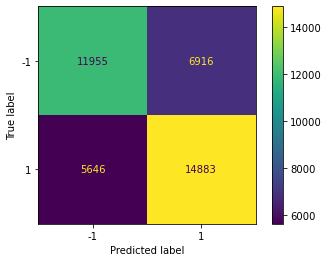

In [15]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR_clf, x_test, y_test)
plt.show()

## PLOT LONG PAIPLOT

In [18]:
# pairplot_fig = sns.pairplot(df,kind='reg')

sns_plot = sns.pairplot(df.sample(1000), height=2.0, kind='reg')
sns_plot.savefig("pairplot.png")

plt.clf() # Clean parirplot figure from sns 

TypeError: 'module' object is not callable

<Figure size 2448x2448 with 0 Axes>

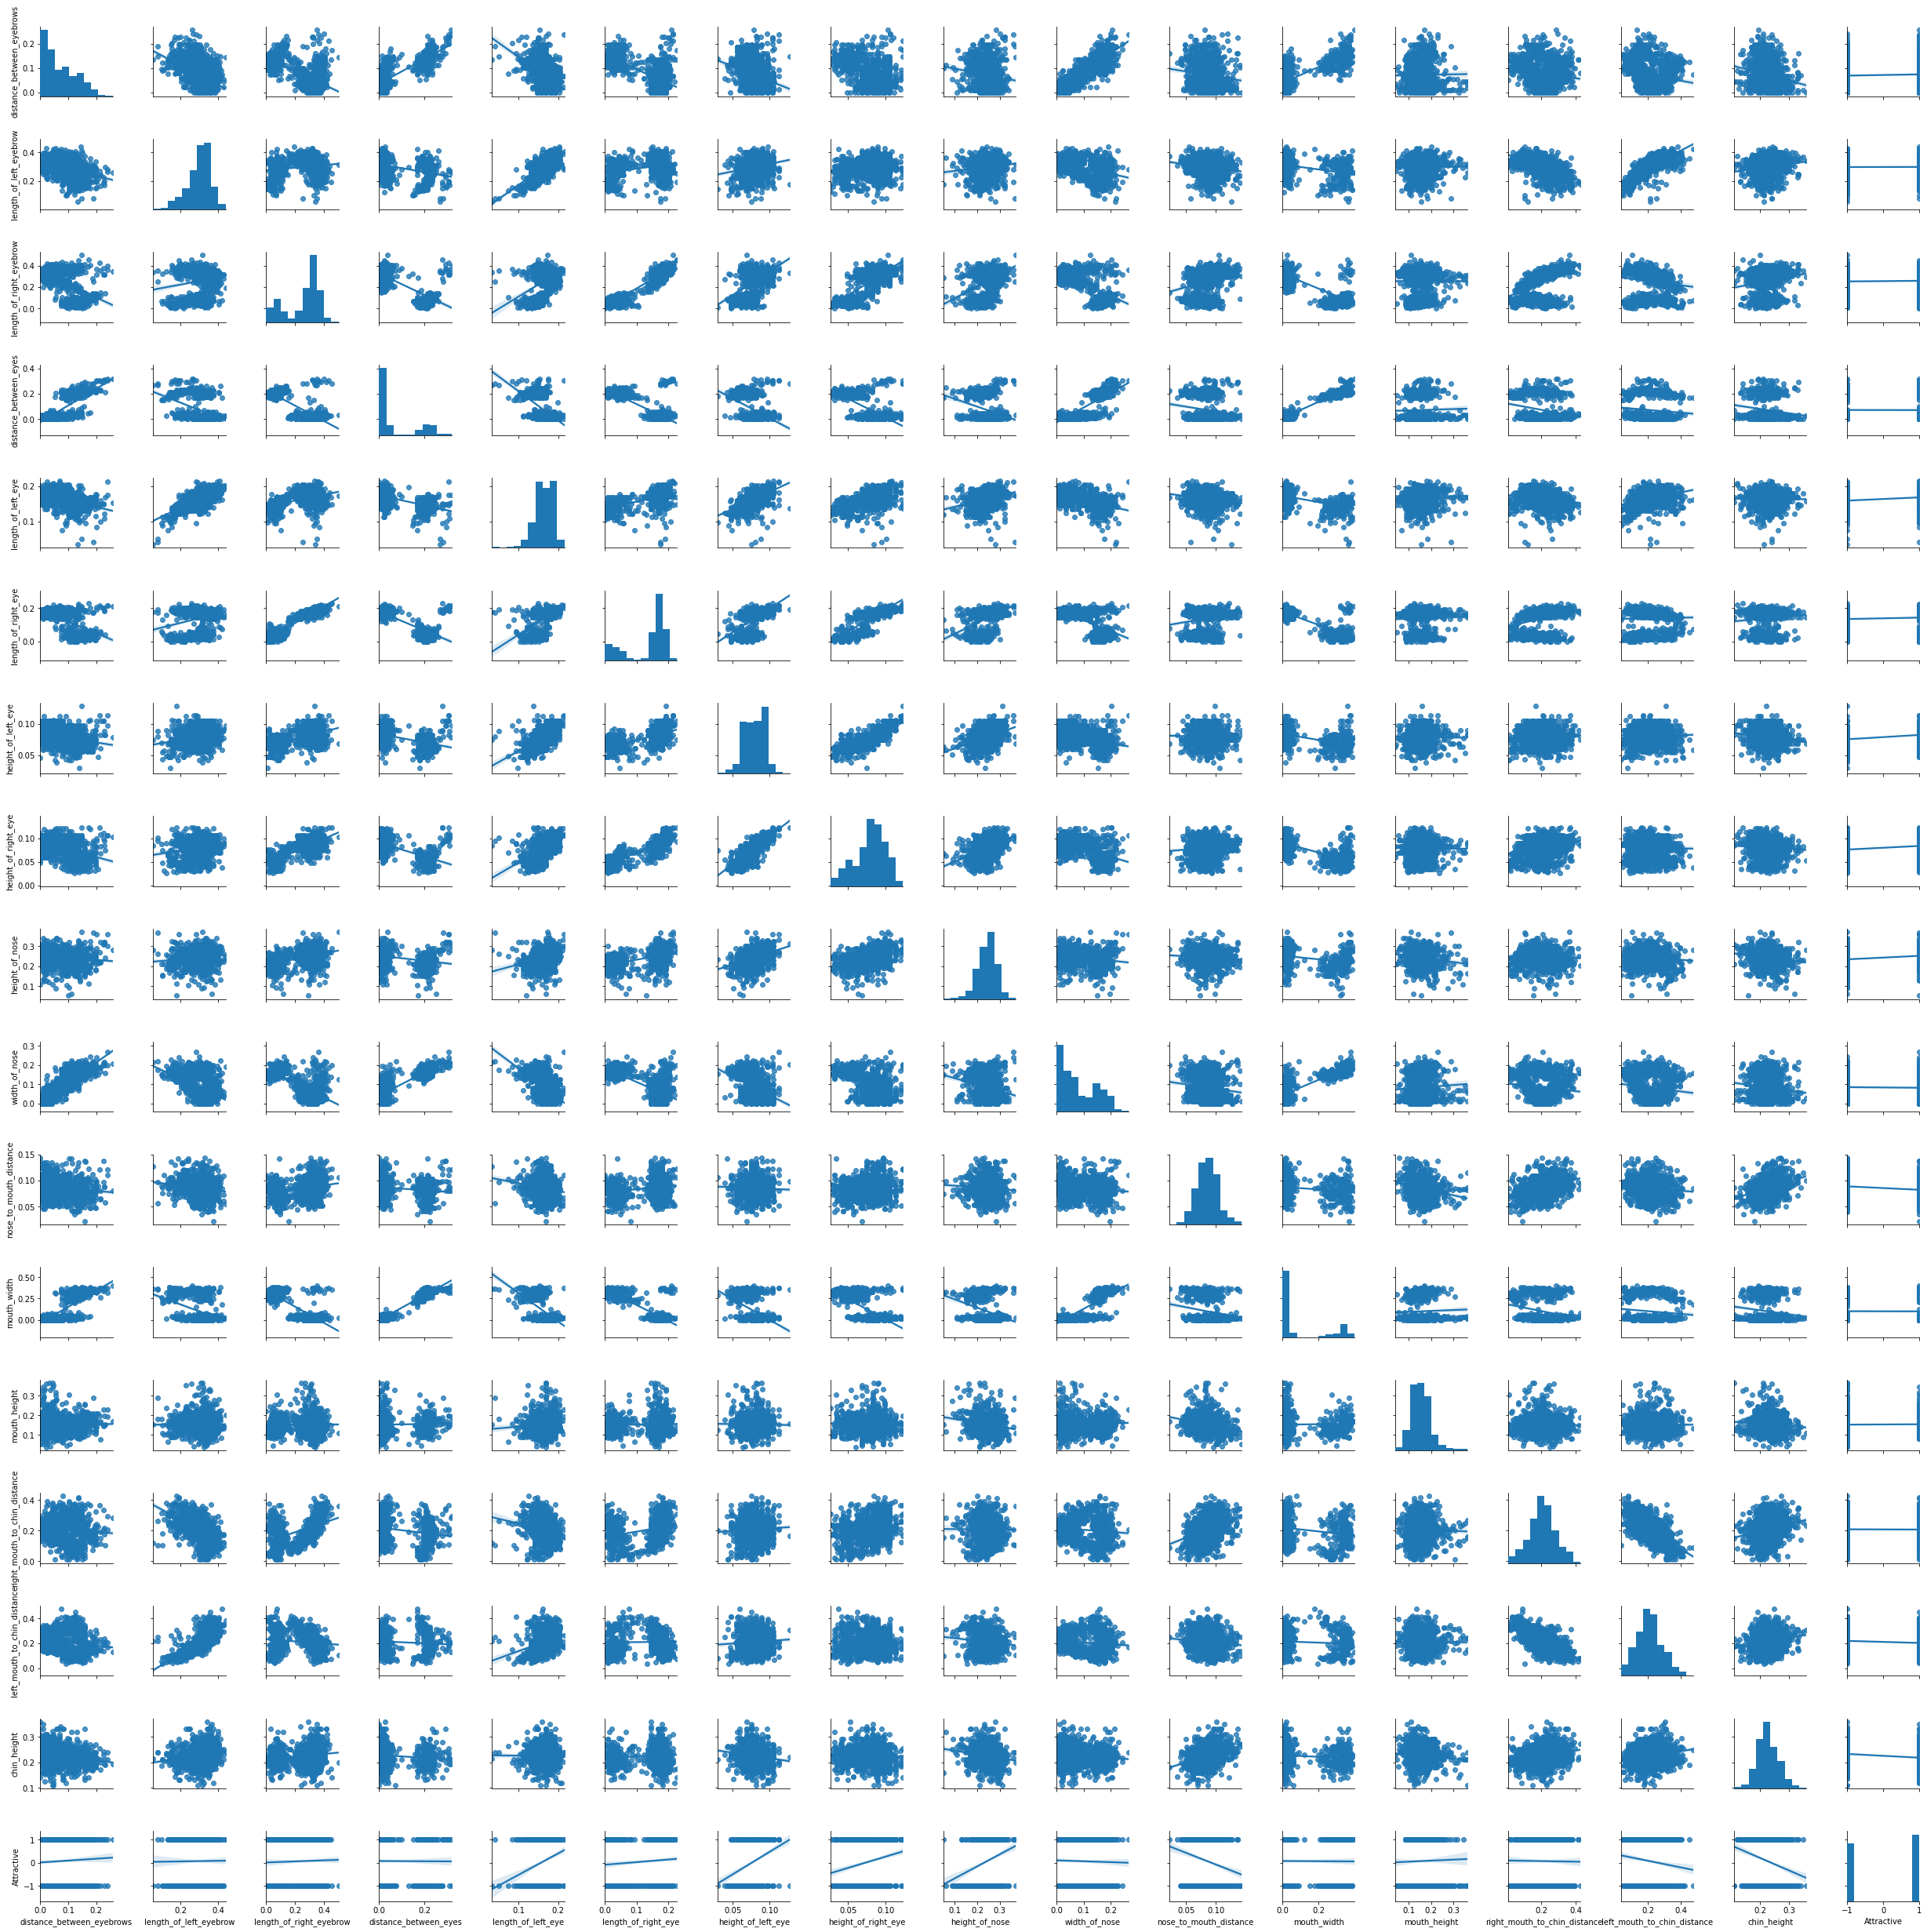

In [23]:
Image.open('pairplot.png') # Show pairplot as image

### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
knn_clf.score(x_test,y_test)

0.6515989847715736

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf_pca = KNeighborsClassifier(n_neighbors=3)
knn_clf_pca.fit(pca_x_train, y_train)
knn_clf_pca.score(pca_x_test,y_test)

0.6225634517766497

### Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB()
NB_clf.fit(x_train,y_train)
NB_clf.score(x_test,y_test)

0.6371065989847716

In [46]:
# PCA Guassain Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB()
NB_clf.fit(pca_x_train,y_train)
NB_clf.score(pca_x_test,y_test)

0.651269035532995

### SVM

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
SVM_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVM_clf.fit(x_train, y_train)
SVM_clf.score(x_test,y_test)

0.7145685279187817